# YANIS TAZI HOMEWORK. 2 DEEP LEARNING SYSTEMS
#### yt1600@nyu.edu

# Question 1)

### Co-adaptation is when neurons depend highly on each other . This is a very important matters because one affected neuron (receiving bad input for example) will affect all the neurons that depend on this one and this is the kind of issue leading to overfitting for example.

### Internal covariate shift refers to the change in the distribution of network activations due to change in network parameters during training. To reduce this, we can use normalization at each layer so that we achieve fix distribution of inputs for every layer. One of the most common technque is to use Batch normalization.
### Internal covariate shift often leads to slow training and can create non convergence


# Question 2)

# Train LeNet 5 :

In [1]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
import tensorflow.keras as keras
from tensorflow.keras.layers import BatchNormalization, LayerNormalization
import tensorflow as tf
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
    from keras.models import Sequential
from keras.layers import Dense

/Users/taziy/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/taziy/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/taziy/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/taziy/anaconda3/lib/python3.7/site-packages/tensorboar

Please install GPU version of TF


# Model 1: Standard normalization for input layer and batch normalization for hidden layers

# a) Data with standard normalization

In [2]:

# Load dataset as train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Set numeric type to float32 from uint8
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize value to [0, 1]
x_train /= 255
x_test /= 255

# Standard normalization
mean_train = x_train.mean()
std_train = x_train.std()
x_train -= mean_train
x_train /= std_train

x_test -= mean_train
x_test /= std_train

# Transform lables to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

x_train_std_input = x_train
x_test_std_input = x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [3]:

tf.random.set_seed(17)

#Instantiate an empty model
model = Sequential()
# C1 Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding='same'))
model.add(BatchNormalization())
# S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model.add(BatchNormalization())
# C3 Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
model.add(BatchNormalization())
# S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(BatchNormalization())
# C5 Fully Connected Convolutional Layer
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
model.add(BatchNormalization())
#Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())
# FC6 Fully Connected Layer
model.add(layers.Dense(84, activation='tanh'))
model.add(BatchNormalization())
#Output Layer with softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])

### While the original paper talks about applying batch norm just before the activation function, it has been found in practice that applying batch norm after the activation yields better results.
### Therefore, I apply it after activation for the hidden layers

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 6)         24        
_________________________________________________________________
average_pooling2d (AveragePo (None, 27, 27, 6)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 6)         24        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 16)        2416      
_________________________________________________________________
batch_normalization_2 (Batch (None, 23, 23, 16)        64        
_________________________________________________________________
average_pooling2d_1 (Average (None, 11, 11, 16)        0

In [5]:
hist = model.fit(x=x_train_std_input,y=y_train, epochs=20, batch_size=128, validation_data=(x_test_std_input, y_test), verbose=1)

Epoch 1/20
469/469 [==============================] - 13s 27ms/step - loss: 0.2075 - accuracy: 0.9425 - val_loss: 0.0996 - val_accuracy: 0.9736
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0860 - accuracy: 0.9778 - val_loss: 0.0716 - val_accuracy: 0.9795
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0634 - accuracy: 0.9839 - val_loss: 0.0545 - val_accuracy: 0.9848
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0514 - accuracy: 0.9867 - val_loss: 0.0542 - val_accuracy: 0.9838
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0436 - accuracy: 0.9889 - val_loss: 0.0437 - val_accuracy: 0.9871
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0375 - accuracy: 0.9908 - val_loss: 0.0445 - val_accuracy: 0.9865
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0333 - accuracy: 0.9919 - val_loss: 0.0407 - val_accuracy: 0.988

In [6]:
model.save('model1_standnorm_input_batchnorm_hidden.h5')

In [3]:
model = keras.models.load_model('model1_standnorm_input_batchnorm_hidden.h5')

In [49]:
for i in [1,3,5,7,9,12]:
    print(model.layers[i].name)
    print()
    print('Gamma :          '+ str(model.layers[i].get_weights()[0].tolist()))
    print()
    print('Beta :          '+ str(model.layers[i].get_weights()[1].tolist()))
    print ()
    print ('####################################################################################################################################################################################################################################')
    print ()

batch_normalization

Gamma :          [1.0001033544540405, 1.0001364946365356, 1.00005304813385, 1.0000249147415161, 1.0000289678573608, 1.000061273574829]

Beta :          [-3.193265651901811e-09, -3.1261129240789387e-09, 1.0744865441836282e-08, -1.8673049773099137e-09, -2.641025842464728e-09, -6.1343565782578935e-09]

####################################################################################################################################################################################################################################

batch_normalization_1

Gamma :          [1.080140471458435, 1.1022557020187378, 1.0472339391708374, 1.026122808456421, 1.024849772453308, 1.055171012878418]

Beta :          [-0.07621415704488754, -0.02155950292944908, 0.22738882899284363, -0.011400452814996243, 0.10398653149604797, -0.0037515745498239994]

###########################################################################################################################################

# Question 3:

# a) Data without standard normalization

In [7]:

# Load dataset as train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Set numeric type to float32 from uint8
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize value to [0, 1]
x_train /= 255
x_test /= 255

# Transform lables to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)



# Model 2: Batch normalization for input and hidden layers

In [8]:
tf.random.set_seed(17)
#Instantiate an empty model
model_batch = Sequential()
# C1 Convolutional Layer
model_batch.add(BatchNormalization(input_shape=(28,28,1)))
model_batch.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding='same'))
model_batch.add(BatchNormalization())
# S2 Pooling Layer
model_batch.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model_batch.add(BatchNormalization())
# C3 Convolutional Layer
model_batch.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
model_batch.add(BatchNormalization())
# S4 Pooling Layer
model_batch.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model_batch.add(BatchNormalization())
# C5 Fully Connected Convolutional Layer
model_batch.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
model_batch.add(BatchNormalization())
#Flatten the CNN output so that we can connect it with fully connected layers
model_batch.add(layers.Flatten())
# FC6 Fully Connected Layer
model_batch.add(layers.Dense(84, activation='tanh'))
model_batch.add(BatchNormalization())
#Output Layer with softmax activation
model_batch.add(layers.Dense(10, activation='softmax'))

# Compile the model
model_batch.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])

In [9]:
model_batch.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_6 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 6)         24        
_________________________________________________________________
average_pooling2d_2 (Average (None, 27, 27, 6)         0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 27, 27, 6)         24        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 23, 16)        2416      
_________________________________________________________________
batch_normalization_9 (Batch (None, 23, 23, 16)       

In [10]:
hist_batch = model_batch.fit(x=x_train,y=y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test), verbose=1)

Epoch 1/20
469/469 [==============================] - 7s 15ms/step - loss: 0.2065 - accuracy: 0.9428 - val_loss: 0.0993 - val_accuracy: 0.9731
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0848 - accuracy: 0.9782 - val_loss: 0.0704 - val_accuracy: 0.9804
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0625 - accuracy: 0.9840 - val_loss: 0.0541 - val_accuracy: 0.9849
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0507 - accuracy: 0.9867 - val_loss: 0.0535 - val_accuracy: 0.9850
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0431 - accuracy: 0.9890 - val_loss: 0.0434 - val_accuracy: 0.9871
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0370 - accuracy: 0.9909 - val_loss: 0.0435 - val_accuracy: 0.9868
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0329 - accuracy: 0.9920 - val_loss: 0.0402 - val_accuracy: 0.9886

In [11]:
model_batch.save('model2_batchnorm_all.h5')

In [50]:
model_batch = keras.models.load_model('model2_batchnorm_all.h5')

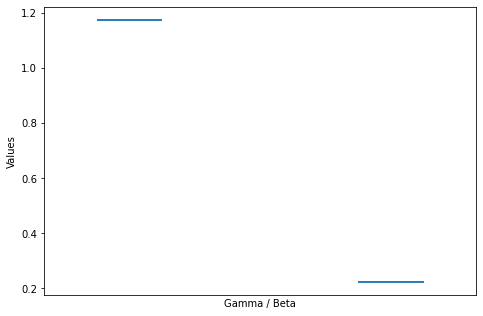

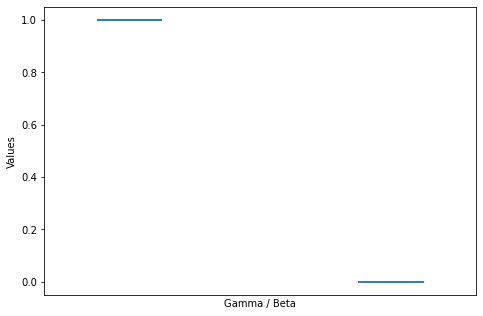

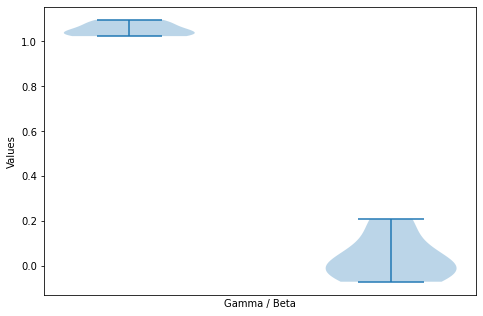

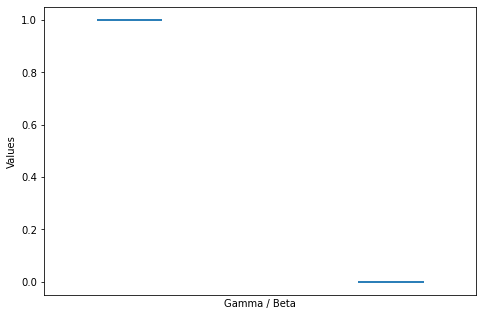

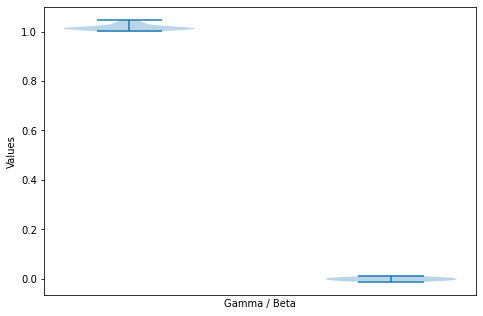

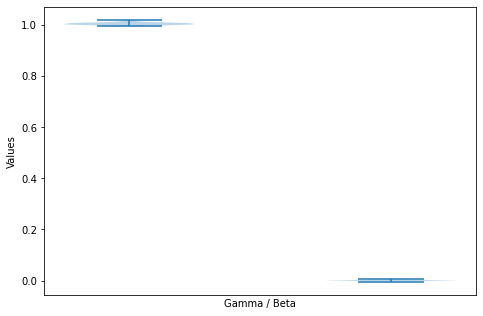

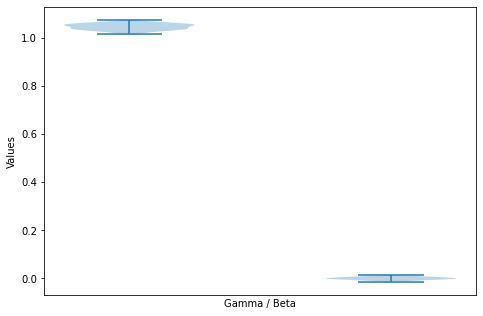

In [66]:
for i in [0,2,4,6,8,10,13]:
    data_to_plot = [model_batch.layers[i].get_weights()[0].tolist(), model_batch.layers[i].get_weights()[1].tolist()]

    # Create a figure instance
    fig = plt.figure()

    # Create an axes instance
    ax = fig.add_axes([0,0,1,1])

    # Create the boxplot
    bp = ax.violinplot(data_to_plot)
    ax.axes.get_xaxis().set_ticks([])
    plt.xlabel("Gamma / Beta")
    plt.ylabel("Values")
    plt.show()

In [61]:
for i in [0,2,4,6,8,10,13]:
    print(model_batch.layers[i].name)
    print()
    print('Gamma :          '+ str(model_batch.layers[i].get_weights()[0].tolist()))
    print()
    print('Beta :          '+ str(model_batch.layers[i].get_weights()[1].tolist()))
    print ()
    print ('####################################################################################################################################################################################################################################')
    print ()

batch_normalization_6

Gamma :          [1.1744343042373657]

Beta :          [0.22457078099250793]

####################################################################################################################################################################################################################################

batch_normalization_7

Gamma :          [1.0000983476638794, 1.0001249313354492, 1.0000451803207397, 1.000023365020752, 1.0000228881835938, 1.0000643730163574]

Beta :          [-7.3766730501745315e-09, -4.5491428402044676e-09, 1.0702621427993719e-10, 4.27229318589184e-09, -4.696779853929911e-09, -1.1279193135038668e-09]

####################################################################################################################################################################################################################################

batch_normalization_8

Gamma :          [1.0776439905166626, 1.0955561399459839, 1.0428701639175415, 1.0234375, 1.0

### The performances have been similar .

# Question4:

# a) Data without standard normalization

In [12]:

# Load dataset as train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Set numeric type to float32 from uint8
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize value to [0, 1]
x_train /= 255
x_test /= 255

# Transform lables to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)



# Model 3: Dropout and no batch normalization
(dropout not applied on pooling layers)

In [14]:

#Instantiate an empty model
model_dropout = Sequential()
# C1 Convolutional Layer
model_dropout.add(Dropout(0.2, input_shape=(28,28,1)))
model_dropout.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding='same'))
# S2 Pooling Layer
model_dropout.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# C3 Convolutional Layer
model_dropout.add(Dropout(0.5))
model_dropout.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# S4 Pooling Layer
model_dropout.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# C5 Fully Connected Convolutional Layer
model_dropout.add(Dropout(0.5))
model_dropout.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

#Flatten the CNN output so that we can connect it with fully connected layers
model_dropout.add(layers.Flatten())

# FC6 Fully Connected Layer
model_dropout.add(Dropout(0.5))
model_dropout.add(layers.Dense(84, activation='tanh'))

#Output Layer with softmax activation
model_dropout.add(Dropout(0.5))
model_dropout.add(layers.Dense(10, activation='softmax'))

# Compile the model
model_dropout.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])

In [15]:
model_dropout.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_5 (Dropout)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_6 (Average (None, 27, 27, 6)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 27, 27, 6)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 23, 23, 16)        2416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 11, 11, 16)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 11, 11, 16)       

In [16]:
hist_dropout = model_dropout.fit(x=x_train,y=y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test), verbose=1)

Epoch 1/20
469/469 [==============================] - 5s 12ms/step - loss: 1.0002 - accuracy: 0.6741 - val_loss: 0.3821 - val_accuracy: 0.8858
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.5666 - accuracy: 0.8236 - val_loss: 0.3058 - val_accuracy: 0.9061
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.5069 - accuracy: 0.8433 - val_loss: 0.2700 - val_accuracy: 0.9205
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.4630 - accuracy: 0.8571 - val_loss: 0.2478 - val_accuracy: 0.9299
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.4338 - accuracy: 0.8677 - val_loss: 0.2283 - val_accuracy: 0.9333
Epoch 6/20
469/469 [==============================] - 5s 12ms/step - loss: 0.4050 - accuracy: 0.8755 - val_loss: 0.2157 - val_accuracy: 0.9369
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.3858 - accuracy: 0.8819 - val_loss: 0.2026 - val_accuracy: 0.9407

In [17]:
model_dropout.save('model3_dropout_all.h5')

### Test accuracy has significantly dropped ! (0.9641 for dropout only vs 0.9920 for batch norm only)

# Question 5 :

# a) Data without standard normalization

In [18]:

# Load dataset as train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Set numeric type to float32 from uint8
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize value to [0, 1]
x_train /= 255
x_test /= 255

# Transform lables to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)



# Model 4: Dropout and batch normalization

In [19]:
from tensorflow.keras.layers import Dropout
#Instantiate an empty model
model_dropout_batch = Sequential()
# C1 Convolutional Layer
model_dropout_batch.add(BatchNormalization(input_shape=(28,28,1)))
model_dropout_batch.add(Dropout(0.2, input_shape=(28,28,1)))
model_dropout_batch.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding='same'))
model_dropout_batch.add(BatchNormalization())
# S2 Pooling Layer
model_dropout_batch.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model_dropout_batch.add(BatchNormalization())
# C3 Convolutional Layer
model_dropout_batch.add(Dropout(0.5))
model_dropout_batch.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
model_dropout_batch.add(BatchNormalization())
# S4 Pooling Layer
model_dropout_batch.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model_dropout_batch.add(BatchNormalization())
# C5 Fully Connected Convolutional Layer
model_dropout_batch.add(Dropout(0.5))
model_dropout_batch.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
model_dropout_batch.add(BatchNormalization())
#Flatten the CNN output so that we can connect it with fully connected layers
model_dropout_batch.add(layers.Flatten())
# FC6 Fully Connected Layer
model_dropout_batch.add(Dropout(0.5))
model_dropout_batch.add(layers.Dense(84, activation='tanh'))
model_dropout_batch.add(BatchNormalization())
#Output Layer with softmax activation
model_dropout_batch.add(Dropout(0.5))
model_dropout_batch.add(layers.Dense(10, activation='softmax'))

# Compile the model
model_dropout_batch.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])

In [20]:
model_dropout_batch.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_13 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
dropout_10 (Dropout)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
batch_normalization_14 (Batc (None, 28, 28, 6)         24        
_________________________________________________________________
average_pooling2d_8 (Average (None, 27, 27, 6)         0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 27, 27, 6)         24        
_________________________________________________________________
dropout_11 (Dropout)         (None, 27, 27, 6)        

In [22]:
hist_dropout_batch = model_dropout_batch.fit(x=x_train,y=y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test), verbose=1)

Epoch 1/50
469/469 [==============================] - 7s 14ms/step - loss: 0.1473 - accuracy: 0.9561 - val_loss: 0.0587 - val_accuracy: 0.9812
Epoch 2/50
469/469 [==============================] - 7s 14ms/step - loss: 0.1435 - accuracy: 0.9575 - val_loss: 0.0568 - val_accuracy: 0.9817
Epoch 3/50
469/469 [==============================] - 7s 14ms/step - loss: 0.1419 - accuracy: 0.9586 - val_loss: 0.0554 - val_accuracy: 0.9827
Epoch 4/50
469/469 [==============================] - 7s 14ms/step - loss: 0.1397 - accuracy: 0.9583 - val_loss: 0.0540 - val_accuracy: 0.9824
Epoch 5/50
469/469 [==============================] - 7s 14ms/step - loss: 0.1377 - accuracy: 0.9592 - val_loss: 0.0525 - val_accuracy: 0.9831
Epoch 6/50
469/469 [==============================] - 7s 14ms/step - loss: 0.1375 - accuracy: 0.9588 - val_loss: 0.0529 - val_accuracy: 0.9823
Epoch 7/50
469/469 [==============================] - 7s 14ms/step - loss: 0.1359 - accuracy: 0.9596 - val_loss: 0.0527 - val_accuracy: 0.9832

In [ ]:
model_dropout_batch.save('model4_dropout_batch_all.h5')

### The performance compared to dropout only has significantly increased ( 0.9850 for dropout. + batch. norm vs 0.9641 for dropout only) . (compared on 20 epochs)
### The performance compared to batch norm only has been slightly reduced( 0.9850 vs 0.9920) . (compared on 20 epochs)


### Conclusion :

### Dropout seems to increase the training time but also avoid overfitting . Dropout is mostly a technique for regularization. It introduces noise into a neural network to force the neural network to learn to generalize well enough to deal with noise. 

### Batch normalization is mostly a technique for improving optimization and it happens that it also. introduce some noise and therefore help for regularization. As for large dataset like ours, optimization is more important than regularizationso batch normalization seems to be more important. A combination of both can also be applied.